In [604]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sn
import math as m
import warnings as w
import numpy as np
import joblib as j
from sklearn.metrics.pairwise import cosine_similarity
w.filterwarnings("ignore")

In [605]:
book=pd.read_csv("Books.csv")
user=pd.read_csv("Users.csv")
rating=pd.read_csv("Ratings.csv")

In [606]:
print("The sape of the book dataset is : ",book.shape)
print("The shape of the user dataset is : ",user.shape)
print("The shape of the rating dataset is : ",rating.shape)

The sape of the book dataset is :  (271360, 8)
The shape of the user dataset is :  (278858, 3)
The shape of the rating dataset is :  (1149780, 3)


In [607]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [608]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [609]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [610]:
book.sample(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
261438,0192800701,Concise Oxford Dictionary of Quotations (Oxfor...,Angela Partington,1997,Oxford University Press,http://images.amazon.com/images/P/0192800701.0...,http://images.amazon.com/images/P/0192800701.0...,http://images.amazon.com/images/P/0192800701.0...
139753,042517123X,Murder Intercontinental,Cynthia Manson,1999,Berkley Publishing Group,http://images.amazon.com/images/P/042517123X.0...,http://images.amazon.com/images/P/042517123X.0...,http://images.amazon.com/images/P/042517123X.0...
35860,0061031526,Down by the Water,Caroline Upcher,2002,HarperTorch,http://images.amazon.com/images/P/0061031526.0...,http://images.amazon.com/images/P/0061031526.0...,http://images.amazon.com/images/P/0061031526.0...


In [611]:
user.sample(3)

,User-ID,Location,Age
234194,234195,"cheshire, connecticut, usa",16.0
26058,26059,"graz, styria, austria",NaN
264022,264023,"churchstoke, powys, united kingdom",16.0


In [612]:
rating.sample(3)

,User-ID,ISBN,Book-Rating
792058,191187,0743237188,0
874876,211847,1559210370,0
379735,91832,002026478X,0


In [613]:
book.duplicated().sum()

0

In [614]:
user.duplicated().sum()

0

In [615]:
rating.duplicated().sum()

0

<Axes: xlabel='Book-Rating', ylabel='count'>

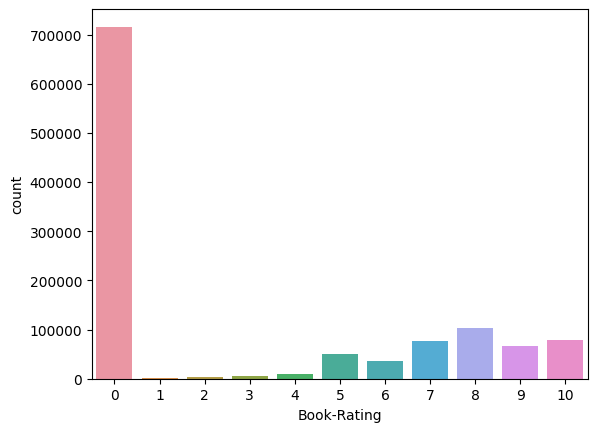

In [616]:
sn.countplot(x="Book-Rating",data=rating)

In [617]:
user['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

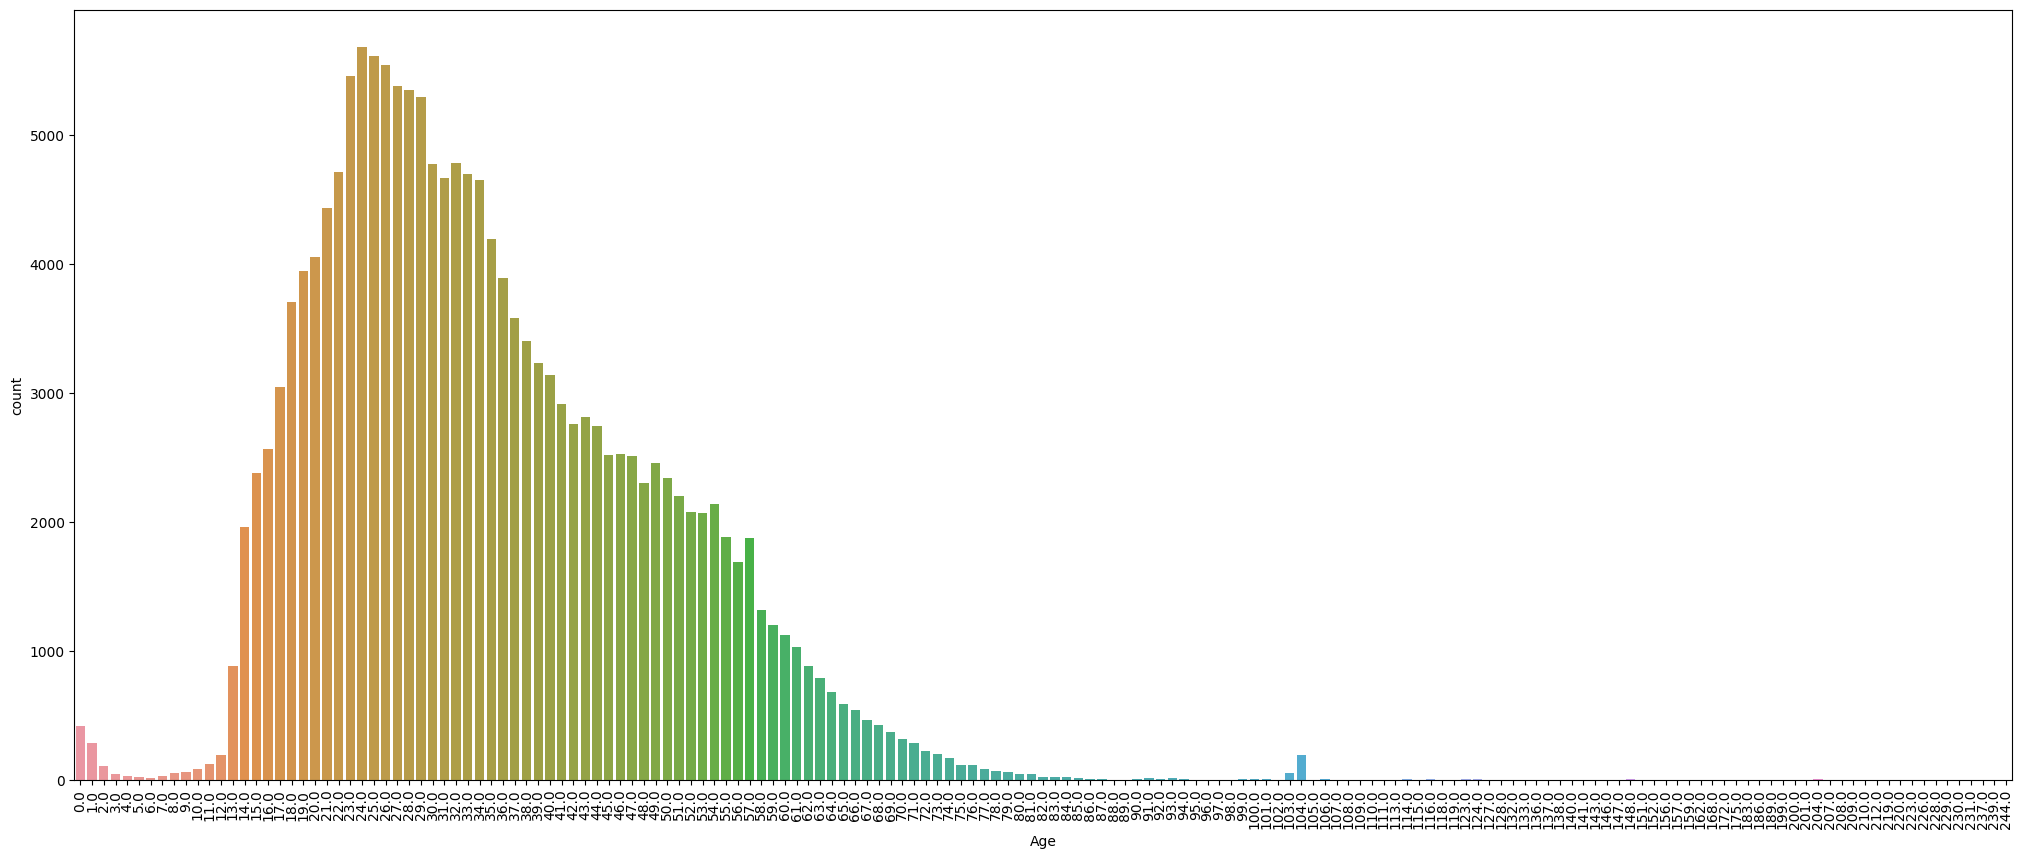

In [618]:
mp.figure(figsize=(25,10))

sn.countplot(x='Age',data=user)
mp.xticks(rotation=90)
mp.show()

In [619]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [620]:
t=["DK Publishing Inc","Gallimard",'0']
book=book[~book['Year-Of-Publication'].isin(t)]

In [621]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '1997', '2001', '1974', '1968', '1987', '1984', '1988', '1963',
       '1956', '1970', '1985', '1978', '1973', '1980', '19

In [622]:
book['Year-Of-Publication']=book['Year-Of-Publication'].apply(lambda x: int(x) if  isinstance(x, str) and x.isdigit() else 0)

In [623]:
book['Year-Of-Publication'].value_counts()

0       205824
1999      4017
2000      3859
2002      3724
1998      3650
         ...  
1938         1
1930         1
1931         1
1927         1
2037         1
Name: Year-Of-Publication, Length: 95, dtype: int64

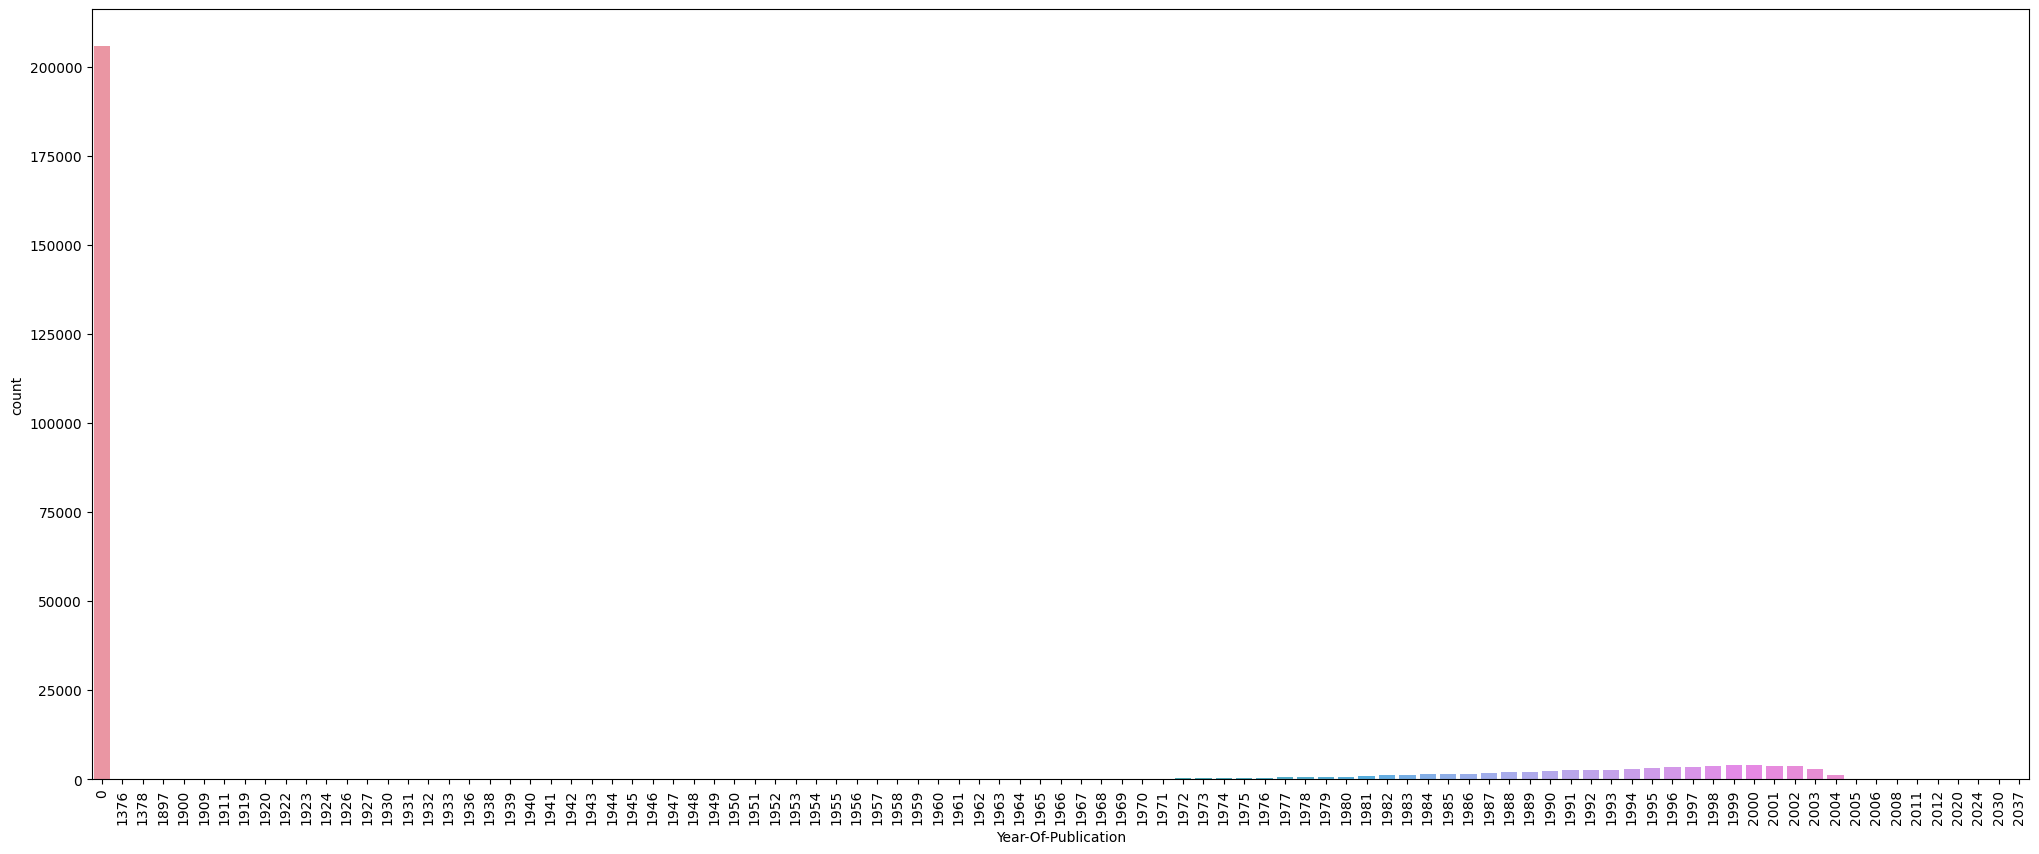

In [624]:
mp.figure(figsize=(25,10))

sn.countplot(x='Year-Of-Publication',data=book)
mp.xticks(rotation=90)
mp.show()

In [625]:
dfb=rating.merge(book,on='ISBN')

In [626]:
dfb.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [627]:
num_rating_df=dfb.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)
num_rating_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
240217,Ã?Â?lpiraten.,2
240218,Ã?Â?rger mit Produkt X. Roman.,4
240219,Ã?Â?sterlich leben.,1
240220,Ã?Â?stlich der Berge.,3


In [628]:
average_rating_df=dfb.groupby('Book-Title').mean()['Book-Rating'].reset_index()
average_rating_df.rename(columns={'Book-Rating':'average_rating'},inplace=True)
average_rating_df

,Book-Title,average_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
240217,Ã?Â?lpiraten.,0.000000
240218,Ã?Â?rger mit Produkt X. Roman.,5.250000
240219,Ã?Â?sterlich leben.,7.000000
240220,Ã?Â?stlich der Berge.,2.666667


In [629]:
pop_df=num_rating_df.merge(average_rating_df,on='Book-Title')
pop_df

,Book-Title,num_rating,average_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
240217,Ã?Â?lpiraten.,2,0.000000
240218,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
240219,Ã?Â?sterlich leben.,1,7.000000
240220,Ã?Â?stlich der Berge.,3,2.666667


In [630]:
pop_df=pop_df.loc[pop_df['num_rating']>=250,['Book-Title','num_rating','average_rating']].sort_values('average_rating',ascending=False)
pop_df


,Book-Title,num_rating,average_rating
80097,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80085,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80104,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80089,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80077,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
226898,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
232813,Whispers,286,2.199301
142755,Presumed Innocent,294,2.139456
93993,Isle of Dogs,288,2.000000


In [631]:
pop_df=pop_df.head(50)

In [632]:
pop_df.head(5)

,Book-Title,num_rating,average_rating
80097,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80085,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80104,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80089,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80077,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [633]:
df=pop_df.merge(dfb,on='Book-Title').drop_duplicates('Book-Title')

In [634]:
df.columns

Index(['Book-Title', 'num_rating', 'average_rating', 'User-ID', 'ISBN',
       'Book-Rating', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [635]:
df.drop(['ISBN','Image-URL-L','Image-URL-S','Publisher','Book-Rating','Year-Of-Publication'],inplace=True,axis=1)

In [636]:
df.head(3)

,Book-Title,num_rating,average_rating,User-ID,Book-Author,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,277427,J. K. Rowling,http://images.amazon.com/images/P/0439136369.0...
428,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,278356,J. K. Rowling,http://images.amazon.com/images/P/0439139600.0...
815,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,277427,J. K. Rowling,http://images.amazon.com/images/P/043936213X.0...


In [637]:
df.shape

(50, 6)

### collborative

In [638]:
rater=dfb.groupby('User-ID').count()['Book-Rating']>200
rate_with_id=rater[rater].index
rate_with_id

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [639]:
filter_rating=dfb[dfb['User-ID']. isin(rate_with_id)]

In [640]:
y=filter_rating.groupby('Book-Title').count()['Book-Rating']>=50
popular_books=y[y].index

In [641]:
final_rating=filter_rating[filter_rating['Book-Title'].isin(popular_books)]

In [642]:
pt=final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [643]:
pt.fillna(0,inplace=True)

In [644]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [645]:
sim_score=cosine_similarity(pt)

In [646]:
sim_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [649]:
def recommend(book_name):
    index=np.where(pt.index==book_name)[0][0]
    similar_books=sorted(list(enumerate(sim_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    for i in similar_books:
        print(pt.index[i[0]])


In [655]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
